# Basic regression: use case "Pillar mat failure"


### Use seaborn for pairplot
!pip install -q seaborn

### Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

## This example uses the tf.keras API, see this guide for details.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [3]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# make dataset for sPGD result

In [4]:
#dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset = pd.read_csv(r'Y:\CON_2019_HMC_PGD-MINESET\simple_model\local_30mm_lsopt_result_5int\predict_data_BPLR_finalArea.csv')
#dataset.head

In [5]:
column_names = dataset.columns
dataset = dataset.loc[:,column_names]
dataset.head()

PARTNO01  PARTNO02  PARTNO03  PARTNO04  PARTNO05  PARTNO06  PARTNO07  \
0       927      1289      1130       851       902      1010      1083   
1      1124       688      1193      1001      1022      1037      1129   
2      1087       783       938      1111      1282       833      1109   
3      1023      1311       948       609      1181       694      1005   
4       880      1120       612       953       833       878       711   

   PARTNO08  PARTNO09  PARTNO10  ...  PARTNO37  PARTNO38  PARTNO39  PARTNO40  \
0       845       722       707  ...       841      1103       631      1127   
1       891      1106      1394  ...       829       618       638      1198   
2      1220      1111      1337  ...       894       882       865       702   
3       761       802      1332  ...      1168      1071      1260       982   
4      1380       593       631  ...      1120      1168      1151      1175   

   PARTNO41  PARTNO42  PARTNO43  PARTNO44  PARTNO45  Area_failure  
0      1170       810      1137      1112      1270   1714.165052  
1      1125      1064       750       860      1236   2503.798817  
2       859      1258      1299      1188       767   2110.577248  
3      1201       938      1008       969       599   1903.343247  
4       672      1045       825       704       638   1628.208291  

[5 rows x 46 columns]

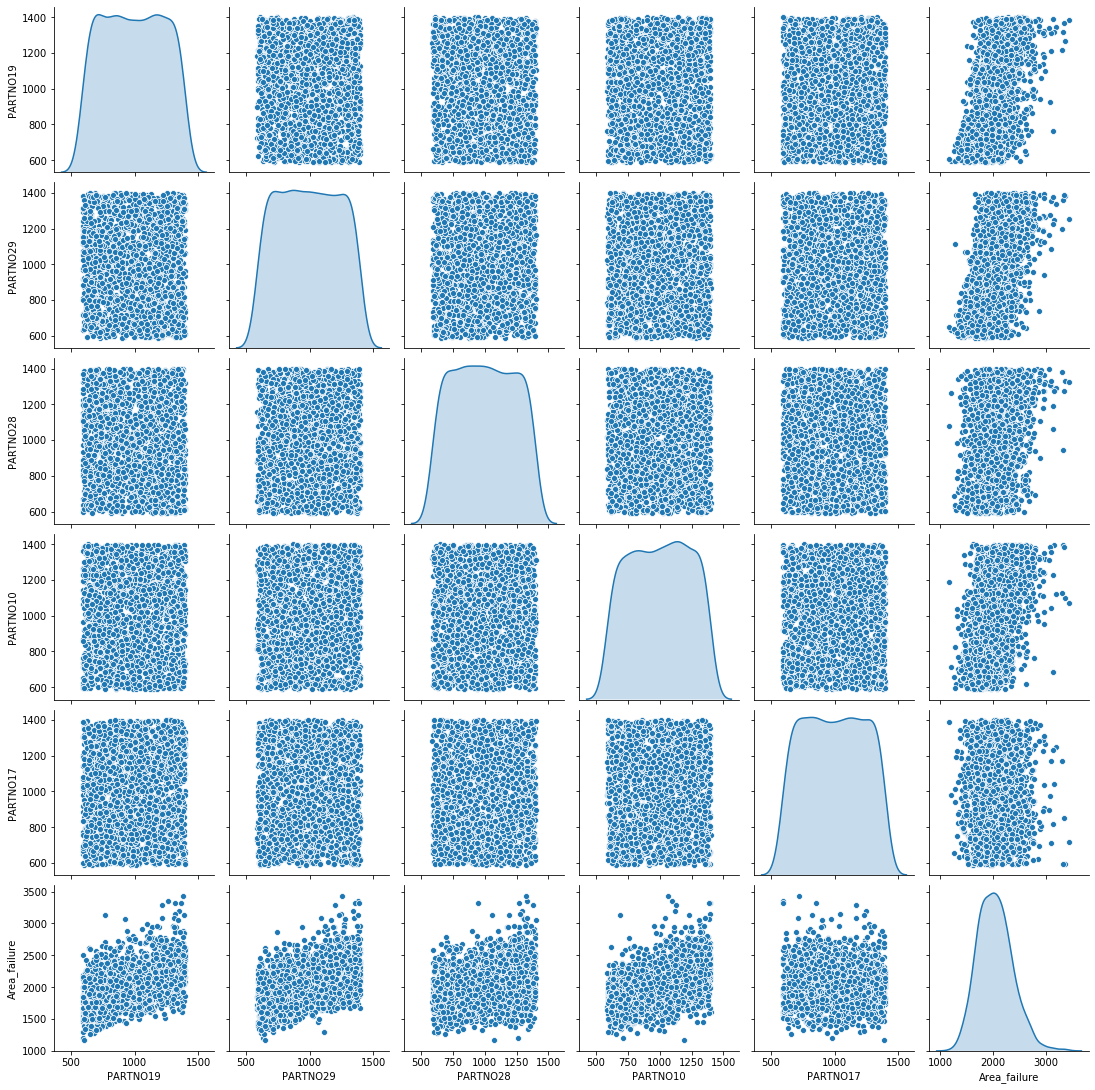

In [6]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)	

fig = sns.pairplot(train_dataset[["PARTNO19", "PARTNO29", "PARTNO28","PARTNO10","PARTNO17","Area_failure"]], diag_kind="kde")	
fig.savefig('foo.png')

In [7]:
train_stats = train_dataset.describe()
train_stats.pop("Area_failure")
train_stats = train_stats.transpose()
train_stats

count        mean         std    min     25%     50%      75%  \
PARTNO01  1920.0  994.999479  232.587430  590.0  796.00   988.0  1199.00   
PARTNO02  1920.0  994.956771  234.069910  590.0  790.00   997.5  1197.00   
PARTNO03  1920.0  996.177083  231.429250  590.0  798.00   995.0  1195.00   
PARTNO04  1920.0  993.645833  232.582091  590.0  791.00   995.5  1193.25   
PARTNO05  1920.0  998.825000  235.742941  590.0  794.75  1001.0  1206.25   
PARTNO06  1920.0  992.931250  232.610754  590.0  791.75   993.5  1193.00   
PARTNO07  1920.0  994.049479  233.522290  590.0  792.00   991.0  1199.25   
PARTNO08  1920.0  991.698437  233.055395  590.0  790.00   990.0  1190.25   
PARTNO09  1920.0  988.929688  235.171652  590.0  784.75   986.0  1192.25   
PARTNO10  1920.0  999.807812  233.114191  590.0  801.00  1004.5  1198.25   
PARTNO11  1920.0  991.427604  233.765644  590.0  791.75   988.5  1194.25   
PARTNO12  1920.0  991.043750  233.451480  590.0  787.00   986.5  1191.25   
PARTNO13  1920.0  990.754167  233.268140  590.0  790.00   986.0  1192.25   
PARTNO14  1920.0  992.523958  234.327685  590.0  788.75   989.0  1197.25   
PARTNO15  1920.0  997.269271  232.523407  590.0  798.00   999.0  1196.00   
PARTNO16  1920.0  996.490625  234.834438  590.0  792.00  1000.0  1199.00   
PARTNO17  1920.0  996.466667  234.513271  590.0  794.00   998.0  1199.25   
PARTNO18  1920.0  996.586458  233.909426  590.0  793.75   995.5  1201.00   
PARTNO19  1920.0  992.135417  235.286174  590.0  789.00   991.0  1195.00   
PARTNO20  1920.0  995.961979  234.609738  590.0  793.00   996.5  1202.00   
PARTNO21  1920.0  993.188021  234.135552  590.0  790.00   992.5  1193.00   
PARTNO22  1920.0  994.679167  234.468601  590.0  790.75   998.5  1196.25   
PARTNO23  1920.0  991.990104  234.116354  590.0  788.00   996.0  1192.25   
PARTNO24  1920.0  992.190625  233.869287  590.0  789.75   990.5  1196.25   
PARTNO25  1920.0  993.453646  231.723519  590.0  795.75   992.0  1192.25   
PARTNO26  1920.0  996.201042  234.946109  590.0  791.75   999.0  1198.25   
PARTNO27  1920.0  988.568229  235.138194  590.0  783.00   987.0  1193.00   
PARTNO28  1920.0  994.475000  233.380587  590.0  795.00   993.0  1196.00   
PARTNO29  1920.0  993.212500  234.325123  590.0  790.75   991.0  1196.00   
PARTNO30  1920.0  995.597396  234.354281  590.0  792.75   993.5  1200.00   
PARTNO31  1920.0  995.182292  234.418005  590.0  794.00   993.0  1199.00   
PARTNO32  1920.0  996.981771  232.116095  590.0  797.00  1001.5  1195.00   
PARTNO33  1920.0  994.966146  235.793182  590.0  788.75   996.0  1201.25   
PARTNO34  1920.0  997.046875  232.324536  590.0  799.00  1000.5  1198.25   
PARTNO35  1920.0  995.303646  234.304966  590.0  796.00   995.0  1198.25   
PARTNO36  1920.0  996.594792  234.568792  590.0  793.75  1000.5  1199.25   
PARTNO37  1920.0  996.494271  231.352112  590.0  798.00   997.0  1192.25   
PARTNO38  1920.0  998.684375  232.491538  590.0  799.75  1004.0  1198.00   
PARTNO39  1920.0  993.638021  234.568862  590.0  789.00   990.0  1195.00   
PARTNO40  1920.0  993.335417  235.333923  590.0  789.00   995.0  1197.25   
PARTNO41  1920.0  994.383854  232.886948  590.0  795.00   995.5  1196.00   
PARTNO42  1920.0  994.656250  233.589552  590.0  792.00   995.5  1195.25   
PARTNO43  1920.0  997.021875  233.640162  590.0  797.75   997.5  1198.00   
PARTNO44  1920.0  996.747396  234.091051  590.0  794.00   999.0  1201.00   
PARTNO45  1920.0  997.219271  234.460200  590.0  792.00   992.5  1204.25   

             max  
PARTNO01  1399.0  
PARTNO02  1399.0  
PARTNO03  1399.0  
PARTNO04  1399.0  
PARTNO05  1399.0  
PARTNO06  1399.0  
PARTNO07  1399.0  
PARTNO08  1399.0  
PARTNO09  1399.0  
PARTNO10  1399.0  
PARTNO11  1399.0  
PARTNO12  1399.0  
PARTNO13  1399.0  
PARTNO14  1399.0  
PARTNO15  1399.0  
PARTNO16  1399.0  
PARTNO17  1399.0  
PARTNO18  1399.0  
PARTNO19  1399.0  
PARTNO20  1399.0  
PARTNO21  1399.0  
PARTNO22  1399.0  
PARTNO23  1399.0  
PARTNO24  1399.0  
PARTNO25  1399.0  
PARTNO26  1399.0  
P

In [8]:
train_labels = train_dataset.pop('Area_failure')
test_labels = test_dataset.pop('Area_failure')

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [9]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape'])
  return model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2944      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 7,169
Trainable params: 7,169
Non-trainable params: 0
_________________________________________________________________


In [10]:
# export trained model
import os
current_dir = os.getcwd()
model.save("{}/trainedMODEL.h5".format(current_dir))

In [11]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[1.3290958 ],
       [0.10051537],
       [0.8299999 ],
       [1.0301702 ],
       [1.4483559 ],
       [1.0539516 ],
       [1.434732  ],
       [1.7314134 ],
       [0.56711566],
       [1.1751146 ]], dtype=float32)

In [12]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])



Epoch: 0, loss:4225722.5000,  mae:2029.1240,  mape:99.6049,  mse:4225722.5000,  val_loss:4255984.4167,  val_mae:2037.4601,  val_mape:99.1824,  val_mse:4255984.5000,  
....................................................................................................
Epoch: 100, loss:3889.2285,  mae:48.4808,  mape:2.4225,  mse:3889.2283,  val_loss:30928.5996,  val_mae:133.0626,  val_mape:6.6688,  val_mse:30928.5996,  
....................................................................................................
Epoch: 200, loss:1465.6926,  mae:29.8126,  mape:1.4867,  mse:1465.6925,  val_loss:30825.6621,  val_mae:134.6509,  val_mape:6.7396,  val_mse:30825.6641,  
....................................................................................................
Epoch: 300, loss:531.2923,  mae:17.7982,  mape:0.8888,  mse:531.2922,  val_loss:32396.4674,  val_mae:139.8817,  val_mape:6.9964,  val_mse:32396.4668,  
.....................................................................

## MAE refers to Mean Absolute Error
## MAPE refers to Mean Absolute Percentage Error
## MSE refers to Mean Squared Error

In [13]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


loss       mae        mse      mape      val_loss     val_mae  \
995  55.031154  5.675480  55.031155  0.281401  37493.113444  150.337753   
996  50.150600  5.594163  50.150593  0.278032  37534.316081  150.369507   
997  49.124205  5.465708  49.124203  0.272522  37952.479818  150.965927   
998  52.188284  5.687620  52.188293  0.280462  37782.512044  150.874741   
999  52.116174  5.660154  52.116165  0.280552  37211.420247  149.614517   

          val_mse  val_mape  epoch  
995  37493.113281  7.523352    995  
996  37534.316406  7.524892    996  
997  37952.480469  7.559605    997  
998  37782.511719  7.549857    998  
999  37211.417969  7.481380    999

Text(0, 0.5, 'MAPE [MIN_AREA]')

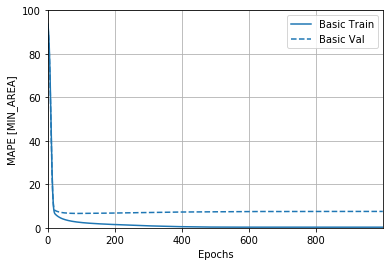

In [14]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mape")
plt.ylim([0, 100])
plt.ylabel('MAPE [MIN_AREA]')


Text(0, 0.5, 'MAE [MIN_AREA]')

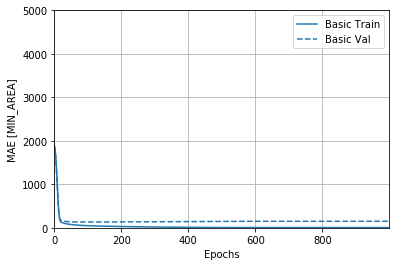

In [15]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 5000])
plt.ylabel('MAE [MIN_AREA]')


In [16]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])



Epoch: 0, loss:49.1749,  mae:5.4710,  mape:0.2700,  mse:49.1749,  val_loss:37187.8846,  val_mae:149.5428,  val_mape:7.4809,  val_mse:37187.8828,  
.........................

Text(0, 0.5, 'MAPE [MIN_AREA]')

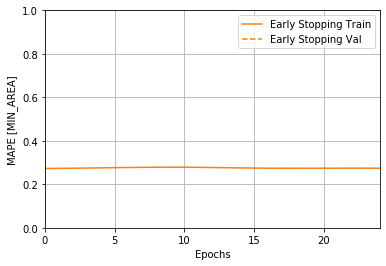

In [17]:
plotter.plot({'Early Stopping': early_history}, metric = "mape")
plt.ylim([0, 1])
plt.ylabel('MAPE [MIN_AREA]')



In [18]:
loss, mae, mse, mape = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} MIN_AREA".format(mae))

480/480 - 0s - loss: 37273.1434 - mae: 153.9682 - mse: 37273.1406 - mape: 7.8066
Testing set Mean Abs Error: 153.97 MIN_AREA


# predictions by using trained model

In [23]:
# predictions by trained model
test_predictions = model.predict(normed_test_data).flatten()

f = open(r'Y:\CON_2019_HMC_PGD-MINESET\simple_model\local_30mm_lsopt_result_5int\prediction.csv','w')
for i in range(0,len(test_predictions)):
    #print(test_predictions[i])
    f.write(str(test_predictions[i])+',')
f.close()
#print(test_predictions)


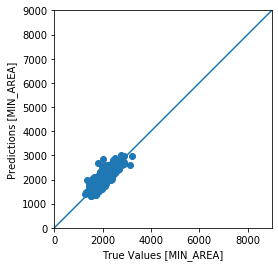

In [24]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MIN_AREA]')
plt.ylabel('Predictions [MIN_AREA]')
lims = [0, 9000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)	

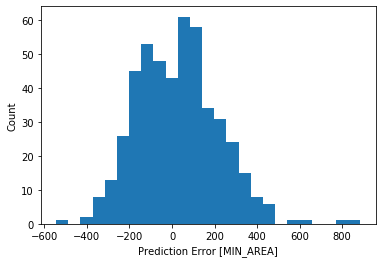

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MIN_AREA]")
_ = plt.ylabel("Count")	

# Generic Algorithm

In [26]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential, load_model
from scipy import optimize
import time


In [27]:
# Number of Curve points
point = 102
# Number of variables 
var = 45


In [28]:
# Get current directory path
current_dir = os.path.dirname(os.path.realpath(__file__))


# Import training raw data
T_dataset = pd.read_csv('{}/Thorax/new_training_data_thorax2_mix3_final_200612.csv'.format(current_dir))
Tdata = T_dataset.iloc[:,1:var+point+1]
# Classification of cross-validation data 
T_TRAIN = Tdata.sample(frac=0.80, random_state=0)
T_TEST = Tdata.drop(T_TRAIN.index)

T_TRAIN = T_TRAIN.values
T_TEST = T_TEST.values


NameError: name '__file__' is not defined

In [43]:
# predict_func
# Mean square error between test and prediction

#column_names = dataset.columns
#dataset = dataset.loc[:,column_names]
# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)

def predict_func(column_names):

    PARTNO01 = column_names[0]
    PARTNO02 = column_names[1]
    PARTNO03 = column_names[2]
    PARTNO04 = column_names[3]
    PARTNO05 = column_names[4]
    PARTNO06 = column_names[5]
    PARTNO07 = column_names[6]
    PARTNO08 = column_names[7]
    PARTNO09 = column_names[8]
    PARTNO10 = column_names[9]

    PARTNO11 = column_names[10]
    PARTNO12 = column_names[11]
    PARTNO13 = column_names[12]
    PARTNO14 = column_names[13]
    PARTNO15 = column_names[14]
    PARTNO16 = column_names[15]
    PARTNO17 = column_names[16]
    PARTNO18 = column_names[17]
    PARTNO19 = column_names[18]
    PARTNO20 = column_names[19]

    PARTNO21 = column_names[20]
    PARTNO22 = column_names[21]
    PARTNO23 = column_names[22]
    PARTNO24 = column_names[23]
    PARTNO25 = column_names[24]
    PARTNO26 = column_names[25]
    PARTNO27 = column_names[26]
    PARTNO28 = column_names[27]
    PARTNO29 = column_names[28]
    PARTNO30 = column_names[29]

    PARTNO31 = column_names[30]
    PARTNO32 = column_names[31]
    PARTNO33 = column_names[32]
    PARTNO34 = column_names[33]
    PARTNO35 = column_names[34]
    PARTNO36 = column_names[35]
    PARTNO37 = column_names[36]
    PARTNO38 = column_names[37]
    PARTNO39 = column_names[38]
    PARTNO40 = column_names[39]

    PARTNO41 = column_names[40]
    PARTNO42 = column_names[41]
    PARTNO43 = column_names[42]
    PARTNO44 = column_names[43]
    PARTNO45 = column_names[44]

    # Prediction data standardize
    # Common variables
    PARTNO01N = norm(PARTNO01)
    PARTNO02N = norm(PARTNO02)
    PARTNO03N = norm(PARTNO03)
    PARTNO04N = norm(PARTNO04) 
    PARTNO05N = norm(PARTNO05)
    PARTNO06N = norm(PARTNO06)
    PARTNO07N = norm(PARTNO07)
    PARTNO08N = norm(PARTNO08)
    PARTNO09N = norm(PARTNO09) 
    PARTNO10N = norm(PARTNO10)

    PARTNO11N = norm(PARTNO11)
    PARTNO12N = norm(PARTNO12)
    PARTNO13N = norm(PARTNO13)
    PARTNO14N = norm(PARTNO14) 
    PARTNO15N = norm(PARTNO15)
    PARTNO16N = norm(PARTNO16)
    PARTNO17N = norm(PARTNO17)
    PARTNO18N = norm(PARTNO18)
    PARTNO19N = norm(PARTNO19) 
    PARTNO20N = norm(PARTNO20)

    PARTNO21N = norm(PARTNO21)
    PARTNO22N = norm(PARTNO22)
    PARTNO23N = norm(PARTNO23)
    PARTNO24N = norm(PARTNO24) 
    PARTNO25N = norm(PARTNO25)
    PARTNO26N = norm(PARTNO26)
    PARTNO27N = norm(PARTNO27)
    PARTNO28N = norm(PARTNO28)
    PARTNO29N = norm(PARTNO29) 
    PARTNO30N = norm(PARTNO30)

    PARTNO31N = norm(PARTNO31)
    PARTNO32N = norm(PARTNO32)
    PARTNO33N = norm(PARTNO33)
    PARTNO34N = norm(PARTNO34) 
    PARTNO35N = norm(PARTNO35)
    PARTNO36N = norm(PARTNO36)
    PARTNO37N = norm(PARTNO37)
    PARTNO38N = norm(PARTNO38)
    PARTNO39N = norm(PARTNO39) 
    PARTNO40N = norm(PARTNO40)

    PARTNO41N = norm(PARTNO41)
    PARTNO42N = norm(PARTNO42)
    PARTNO43N = norm(PARTNO43)
    PARTNO44N = norm(PARTNO44) 
    PARTNO45N = norm(PARTNO45)

    # Result of prediction data   
    predict_cur = model.predict([[
        PARTNO01N, PARTNO02N, PARTNO03N,PARTNO04N,PARTNO05N, \
        PARTNO01N, PARTNO02N, PARTNO03N,PARTNO04N,PARTNO05N, \
        PARTNO01N, PARTNO02N, PARTNO03N,PARTNO04N,PARTNO05N, \
        PARTNO01N, PARTNO02N, PARTNO03N,PARTNO04N,PARTNO05N, \
        PARTNO01N, PARTNO02N, PARTNO03N,PARTNO04N,PARTNO05N, \
        PARTNO01N, PARTNO02N, PARTNO03N,PARTNO04N,PARTNO05N, \
        PARTNO01N, PARTNO02N, PARTNO03N,PARTNO04N,PARTNO05N, \
        PARTNO01N, PARTNO02N, PARTNO03N,PARTNO04N,PARTNO05N, \
        PARTNO01N, PARTNO02N, PARTNO03N,PARTNO04N,PARTNO05N, \
        ]])

    print( predict_cur )
    return   predict_cur[0]


In [52]:
# bnds; doundary conditions
# Parameter of Boundary conditions
bnds = [( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), \
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), \
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), \
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), \
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), \
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), \
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), \
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), \
        ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), ( 440, 1400 ), 
]

In [53]:
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')



4 ]
 [ 901.5596 ]
 [ 882.9097 ]
 [1914.058  ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5596 ]
 [ 882.9097 ]
 [1914.058  ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5596 ]
 [ 882.9097 ]
 [1914.058  ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5596 ]
 [ 882.90967]
 [1914.0581 ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5596 ]
 [ 882.9097 ]
 [1914.058  ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5596 ]
 [ 882.9097 ]
 [1914.058  ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5597 ]]
[[ 882.9097 ]
 [1914.058  ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5596 ]
 [ 882.9097 ]
 [1914.058  ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5596 ]
 [ 882.9097 ]
 [1914.058  ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5596 ]
 [ 882.9097 ]
 [1914.058  ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5596 ]
 [ 882.9097 ]
 [1914.058  ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5596 ]
 [ 882.9097 ]
 [1914.058  ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5596 ]
 [ 882.90967]
 [1914.0581 ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5596 ]
 [ 882.9097 ]
 [1914.058  ]
 [2621.2656 ]
 [2652.2144 ]
 [ 901.5596 ]
 

In [54]:
# Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([ 924.86464221, 1122.64182314,  471.85881358,  464.5102102 ,
         942.90501048,  581.32574712,  581.10127503,  681.03656656,
        1016.41712015, 1319.55337502, 1111.90210024,  839.549048  ,
        1037.38287102,  694.70878007,  668.74967294,  642.31139124,
         939.75281913, 1043.84320966,  766.30095694,  989.65062941,
        1393.89234253, 1339.90486863,  660.77698759, 1089.96636459,
         922.1787471 ,  475.18640443,  534.47873642, 1394.22505126,
         959.7357035 ,  679.61961746,  822.65956419, 1217.12174861,
        1118.97113133,  870.8451976 , 1098.76996457,  768.46930954,
        1253.05733795, 1121.61662227, 1355.38985935, 1328.55890749,
         723.98234797, 1159.23952464,  620.1134561 , 1057.70067903,
        1217.09748476]),
 882.9097290039062)

In [47]:
from scipy import optimize
# best1bin popsize 20
result_best1bin = optimize.differential_evolution(predict_func, bnds, popsize=20, strategy='best1bin', init='latinhypercube')

5 ]
 [1366.1991 ]
 [ 882.9099 ]
 [ 893.62775]
 [1107.9043 ]
 [2566.5815 ]
 [1366.1991 ]
 [ 882.9099 ]
 [ 893.62775]
 [1107.9043 ]
 [2566.5815 ]
 [1366.1991 ]
 [ 882.9099 ]
 [ 893.62775]
 [1107.9043 ]
 [2566.5815 ]
 [1366.1991 ]
 [ 882.90985]
 [ 893.6277 ]
 [1107.9043 ]
 [2566.5815 ]
 [1366.1991 ]
 [ 882.9099 ]
 [ 893.62775]
 [1107.9043 ]
 [2566.5815 ]
 [1366.1991 ]
 [ 882.9099 ]
 [ 893.62775]
 [1107.9043 ]
 [2566.5815 ]
 [1366.199  ]]
[[ 882.9099 ]
 [ 893.62775]
 [1107.9043 ]
 [2566.5815 ]
 [1366.1991 ]
 [ 882.9099 ]
 [ 893.62775]
 [1107.9043 ]
 [2566.5815 ]
 [1366.1991 ]
 [ 882.9099 ]
 [ 893.62775]
 [1107.9043 ]
 [2566.5815 ]
 [1366.1991 ]
 [ 882.9099 ]
 [ 893.62775]
 [1107.9043 ]
 [2566.5815 ]
 [1366.1991 ]
 [ 882.9099 ]
 [ 893.62775]
 [1107.9043 ]
 [2566.5815 ]
 [1366.1991 ]
 [ 882.9099 ]
 [ 893.62775]
 [1107.9043 ]
 [2566.5815 ]
 [1366.1991 ]
 [ 882.90985]
 [ 893.6277 ]
 [1107.9043 ]
 [2566.5815 ]
 [1366.1991 ]
 [ 882.9099 ]
 [ 893.62775]
 [1107.9043 ]
 [2566.5815 ]
 [1366.1991 ]
 

In [48]:
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([ 924.86216184,  911.01657354,  994.61179308, 1203.56684638,
        1048.72342125, 1295.90191943, 1290.01602317, 1234.70139146,
        1347.9848862 , 1108.66522339, 1090.58225567,  887.14742456,
        1221.42220061,  714.06502843, 1141.54674441, 1170.24155886,
         858.13742329,  624.89311613,  868.38677685,  971.07722549,
        1323.51866963, 1066.801681  , 1032.45854387, 1063.62933268,
        1280.79690066,  632.78699605, 1204.81576896, 1306.92477534,
         804.74418079,  804.83896499, 1046.30002568, 1106.71179997,
        1046.31995701,  918.26654497,  805.86611136, 1133.89277383,
        1030.17484435,  749.57155924, 1300.68747992,  988.82560698,
         860.37298092, 1090.56285186, 1143.84039497,  833.60294605,
        1107.1684325 ]),
 882.909912109375)

In [50]:
from scipy import optimize
# best1bin popsize 50
result_best1bin = optimize.differential_evolution(predict_func, bnds, popsize=50, strategy='best1bin', init='latinhypercube')


  ]
 [3723.4526 ]
 [ 882.9101 ]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4526 ]
 [ 882.9101 ]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4526 ]
 [ 882.9101 ]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4526 ]
 [ 882.91003]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4526 ]
 [ 882.9101 ]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4526 ]
 [ 882.9101 ]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4521 ]]
[[ 882.9101 ]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4526 ]
 [ 882.9101 ]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4526 ]
 [ 882.9101 ]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4526 ]
 [ 882.9101 ]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4526 ]
 [ 882.9101 ]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4526 ]
 [ 882.9101 ]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4526 ]
 [ 882.91003]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4526 ]
 [ 882.9101 ]
 [2795.6597 ]
 [2877.5947 ]
 [2584.36   ]
 [3723.4526 ]
 

In [51]:
# Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([ 924.86969377, 1231.34779995, 1241.22061569, 1205.73451138,
        1341.49897213,  983.16414308,  982.96038792,  853.81943   ,
         686.43167493,  866.96690802, 1129.86280818,  804.66470496,
         838.28582077,  793.44892214, 1156.53744578, 1082.04990873,
        1399.66759776,  955.711125  , 1283.07084317, 1289.3922702 ,
        1037.81023441,  863.46160369,  683.81433685,  960.59383949,
        1359.40993253, 1092.29385592,  659.8990689 ,  708.97744437,
         705.12637858,  714.29299565, 1357.45994392, 1169.29312574,
        1108.0920783 , 1393.4362245 , 1226.82449815,  905.19725139,
        1013.36492988,  865.785438  ,  595.45223718, 1230.42391521,
        1384.63348683,  860.34455157,  850.65406788, 1329.32811676,
         902.92130532]),
 882.9100952148438)

In [ ]:
# best1exp
result_best1exp = optimize.differential_evolution(predict_func, bnds, strategy=‘best1exp’, init='latinhypercube',)

# Get minimize parameters
minimum = result_genetic.x
minimum